In [1]:
from edgar_prelim import *
import pandas as pd
%load_ext autoreload
%autoreload 2
%matplotlib inline
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [2]:
cik='0000004962'

In [3]:
# Parameters
cik = "0001143921"


# Company

In [4]:
cik_df = pd.read_sql(text("select cik, sic, sic_description, company_name, ticker from cik where cik = :cik").bindparams(cik=cik), prelim_engine)
cik_df.rename({'cik': 'CIK', 'sic': 'SIC', 'sic_description': 'Description', 'company_name': 'Name', 'ticker': 'Ticker'}, axis=1).T.rename({0: ''}, axis=1)

,
CIK,0001143921
SIC,6022
Description,STATE COMMERCIAL BANKS
Name,"VANTAGESOUTH BANCSHARES, INC."
Ticker,


In [5]:
prelims = query_prelims(cik)

# Summary Statistics

In [6]:
prelims.groupby('item').item_value.describe()

,count,mean,std,min,25%,50%,75%,max
item,,,,,,,,
book value per share,18.0,6.551667e+00,2.130574e+00,4.16,4.545,6.535,8.04,10.24
interest income,35.0,9.507259e+06,7.056468e+06,2336.00,5002131.500,9522000.000,12522500.00,22658000.00
net income,35.0,-9.417442e+05,5.856951e+06,-32047000.00,-610000.000,661.000,1139500.00,3700000.00
net interest income,35.0,6.971749e+06,6.086201e+06,1546.00,3499411.500,6346000.000,7644500.00,20428000.00
provision for loan losses,35.0,1.641396e+06,2.263266e+06,108.00,173000.000,757000.000,1870500.00,8389000.00


# Plots

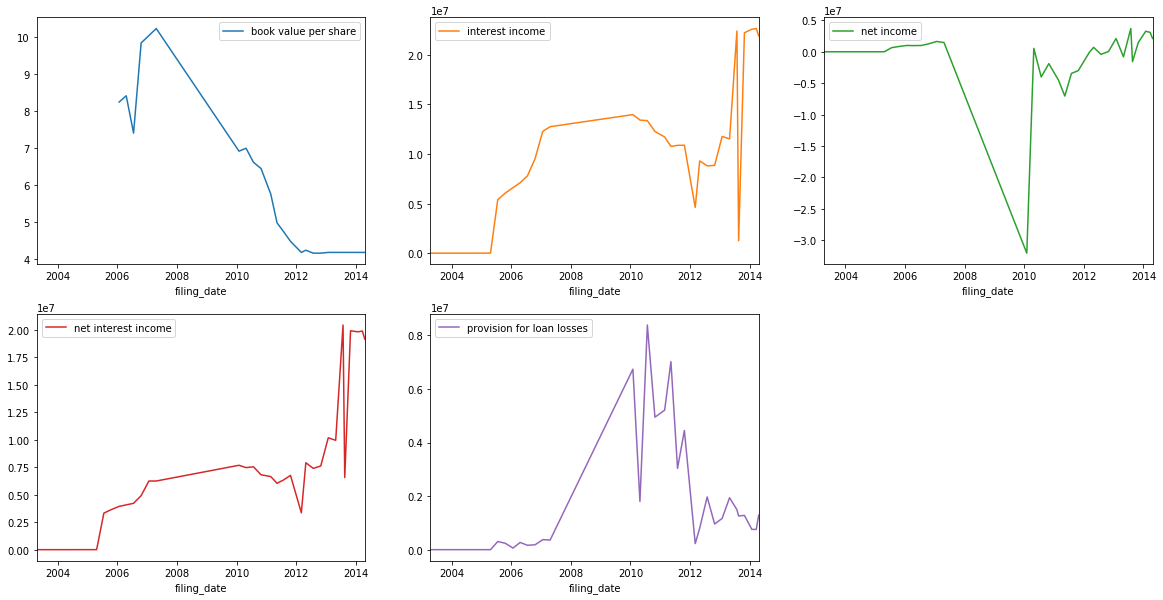

In [7]:
_ = prelims.set_index('filing_date').pivot(columns='item', values='item_value').fillna(method="ffill").plot(subplots=True, layout=(2, 3), figsize=(20, 10), sharex=False)

# Quality

In [8]:
validate_prelims(prelims)

period   msg_type  \
cik        item                                                                 
0001143921 book value per share       2003Q1 to 2005Q3: 11 periods    missing   
           book value per share       2007Q2 to 2009Q3: 10 periods    missing   
           book value per share                             2012Q3    missing   
           book value per share        2013Q1 to 2014Q1: 5 periods    missing   
           interest income                                  2003Q4    missing   
           interest income                                  2004Q4    missing   
           interest income            2007Q2 to 2009Q3: 10 periods    missing   
           interest income                                  2013Q1  duplicate   
           net income                                       2003Q4    missing   
           net income                                       2004Q4    missing   
           net income                 2007Q2 to 2009Q3: 10 periods    missing   
           net income                                       2013Q1  duplicate   
           net interest income                              2003Q4    missing   
           net interest income                              2004Q4    missing   
           net interest income        2007Q2 to 2009Q3: 10 periods    missing   
           net interest income                              2013Q1  duplicate   
           provision for loan losses                        2003Q4    missing   
           provision for loan losses                        2004Q4    missing   
           provision for loan losses  2007Q2 to 2009Q3: 10 periods    missing   
           provision for loan losses                        2013Q1  duplicate   
           total revenue                                      None      empty   

                                                 message  
cik        item                                           
0001143921 book value per share           Missing period  
           book value per share           Missing period  
           book value per share           Missing period  
           book value per share           Missing period  
           interest income                Missing period  
           interest income                Missing period  
           interest income                Missing period  
           interest income              Duplicate period  
           net income                     Missing period  
           net income                     Missing period  
           net income                     Missing period  
           net income                   Duplicate period  
           net interest income            Missing period  
           net interest income            Missing period  
           net interest income            Missing period  
           net interest income          Duplicate period  
           provision for loan losses      Missing period  
           provision for loan losses      Missing period  
           provision for loan losses      Missing period  
           provision for loan losses    Duplicate period  
           total revenue              No values for item

# Data

In [9]:
def make_clickable(val: str) -> str: 
    if isinstance(val, str):
        name, url = val.split('#')
        return f'<a href="{url}">{name}</a>'
    else:
        return ''

(prelims
 .assign(fiscal_period = prelims.fiscal_period.str.cat(prelims.filing_href, sep='#'), filing_date = prelims.filing_date.map(lambda d: d.strftime('%Y-%m-%d')))
 .loc[:, ['filing_date', 'fiscal_period', 'item', 'item_value', 'src_table', 'src_row', 'src_column', 'src_value', 'src_units']]
 .set_index(['filing_date', 'item'])
 .style.format({'fiscal_period': make_clickable})
)

In [10]:
#discard_prelim(cik, date(2019, 12, 31))
#force_reload_prelim(cik, date(2019, 12, 31), delete_filings=False)
#force_reload_prelim_between(cik,  start=date(2002, 6, 1), end=date(2019, 12, 31), delete_filings=False)

In [11]:
#d = date(2018, 10, 29)
#extract_prelim_statements(cik, start=d, end=d)

In [12]:
#d = date(2019, 4, 22)
#filings = query_edgar_for_filings(cik, "8-K", start=d, end=d, require_xbrl=False)
#report = query_edgar_for_submission_text(filings[0].href)
#submission = load_submission(report.href)
#tables = list(parse_tables(submission))
#items_from_tables(tables)

In [13]:
#widget = query_prelims_for_override(cik, filing_date='2006-01-27', item=None)
#widget

In [14]:
#widget.save()